DATASET: [datos abiertos anemia](https://www.datosabiertos.gob.pe/dataset/morbilidad-anemia)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df_anemia = pd.read_csv('/content/TB_ANEMIA.csv',sep = ";")
df_anemia.head(10)

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
0,36178991,6,M,F,NaN,20210524,D509,D,2137
1,38986407,2,A,M,1128.0,20211118,D509,D,10836
2,39002414,1,A,F,1128.0,20210417,D509,D,10836
3,39002414,1,A,F,1128.0,20210413,D509,D,10836
4,39002414,3,A,F,1128.0,20220612,D509,D,10836
5,40663149,3,A,F,1542.0,20230613,D509,D,1030
6,39390036,1,A,F,1128.0,20210118,D509,D,10836
7,39390036,1,A,F,1128.0,20210123,D509,D,10836
8,39390036,1,A,F,1128.0,20210518,D509,D,10836
9,39390036,2,A,F,1128.0,20220116,D509,D,10836


In [27]:
df_ubigeos = pd.read_csv('/content/TB_UBIGEOS.csv',sep = ";")
df_ubigeos.dtypes

,0
id_ubigeo,int64
ubigeo_reniec,float64
ubigeo_inei,int64
departamento_inei,int64
departamento,object
provincia_inei,int64
provincia,object
distrito,object
region,object
macroregion_inei,object


In [31]:
df_anemia_ubigeo = df_ubigeos[['id_ubigeo','departamento_inei']]
df_anemia_ubigeo.head()

,id_ubigeo,departamento_inei
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


# EDA

In [32]:
df_anemia.shape

(1327924, 9)

In [33]:
df_anemia.isna().sum()

,0
id_persona,0
Edad,0
Tipo_edad,0
Sexo,0
id_ubigeo,10817
Fecha_atencion,0
Diagnostico,0
Tipo_Dx,0
id_eess,0


In [34]:
df_anemia.drop(['id_persona'],axis=1,inplace=True)
df_anemia.head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
0,6,M,F,NaN,20210524,D509,D,2137
1,2,A,M,1128.0,20211118,D509,D,10836
2,1,A,F,1128.0,20210417,D509,D,10836
3,1,A,F,1128.0,20210413,D509,D,10836
4,3,A,F,1128.0,20220612,D509,D,10836
5,3,A,F,1542.0,20230613,D509,D,1030
6,1,A,F,1128.0,20210118,D509,D,10836
7,1,A,F,1128.0,20210123,D509,D,10836
8,1,A,F,1128.0,20210518,D509,D,10836
9,2,A,F,1128.0,20220116,D509,D,10836


# ELIMINAMOS LOS NULOS EN UBIGEO

In [35]:
df_anemia.dropna(subset=['id_ubigeo'],inplace=True)
df_anemia.shape

(1317107, 8)

# CODIFICACION DE UBIGEO POR DPTO

In [36]:
df_anemia = df_anemia.merge(df_anemia_ubigeo,on='id_ubigeo',how='left')
df_anemia.head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,departamento_inei
0,2,A,M,1128.0,20211118,D509,D,10836,12
1,1,A,F,1128.0,20210417,D509,D,10836,12
2,1,A,F,1128.0,20210413,D509,D,10836,12
3,3,A,F,1128.0,20220612,D509,D,10836,12
4,3,A,F,1542.0,20230613,D509,D,1030,19
5,1,A,F,1128.0,20210118,D509,D,10836,12
6,1,A,F,1128.0,20210123,D509,D,10836,12
7,1,A,F,1128.0,20210518,D509,D,10836,12
8,2,A,F,1128.0,20220116,D509,D,10836,12
9,3,A,F,1597.0,20210529,D509,D,2177,20


In [40]:
df_anemia.dtypes

,0
Edad,int64
Tipo_edad,object
Sexo,object
id_ubigeo,float64
Fecha_atencion,int64
Diagnostico,object
Tipo_Dx,object
id_eess,int64
departamento_inei,int64


In [42]:
df_anemia.Tipo_edad.value_counts()

,count
Tipo_edad,
A,933646
M,382442
D,1019


In [43]:
df_anemia['edad_total'] = df_anemia.apply(
    lambda row:row['Edad'] /  12 if row['Tipo_edad'] =='M' else
    (row['Edad'] / 365 if row['Tipo_edad'] == "D" else row['Edad'])
    ,axis=1)
df_anemia.head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,departamento_inei,edad_total
0,2,A,M,1128.0,20211118,D509,D,10836,12,2.0
1,1,A,F,1128.0,20210417,D509,D,10836,12,1.0
2,1,A,F,1128.0,20210413,D509,D,10836,12,1.0
3,3,A,F,1128.0,20220612,D509,D,10836,12,3.0
4,3,A,F,1542.0,20230613,D509,D,1030,19,3.0
5,1,A,F,1128.0,20210118,D509,D,10836,12,1.0
6,1,A,F,1128.0,20210123,D509,D,10836,12,1.0
7,1,A,F,1128.0,20210518,D509,D,10836,12,1.0
8,2,A,F,1128.0,20220116,D509,D,10836,12,2.0
9,3,A,F,1597.0,20210529,D509,D,2177,20,3.0


In [46]:
df_anemia.Tipo_Dx.value_counts()

,count
Tipo_Dx,
D,1317107


In [47]:
df_anemia.dtypes

,0
Edad,int64
Tipo_edad,object
Sexo,object
id_ubigeo,float64
Fecha_atencion,int64
Diagnostico,object
Tipo_Dx,object
id_eess,int64
departamento_inei,int64
edad_total,float64


In [48]:
df_anemia.Diagnostico.value_counts()

,count
Diagnostico,
D509,1267210
D649,27499
D539,7149
D508,6028
D500,3275
D510,1115
D519,982
D648,602
D530,567


In [49]:
df_anemia['cie10'] = np.where(df_anemia['Diagnostico'].str.startswith(('D50','D53','D64')),1,0)

In [50]:
df_anemia.head()

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,departamento_inei,edad_total,cie10
0,2,A,M,1128.0,20211118,D509,D,10836,12,2.0,1
1,1,A,F,1128.0,20210417,D509,D,10836,12,1.0,1
2,1,A,F,1128.0,20210413,D509,D,10836,12,1.0,1
3,3,A,F,1128.0,20220612,D509,D,10836,12,3.0,1
4,3,A,F,1542.0,20230613,D509,D,1030,19,3.0,1


# CODIFICAICON DE SEXO

In [51]:
df_anemia['sexo_int'] = df_anemia['Sexo'].map({'M':1,'F':0})
df_anemia.head()

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,departamento_inei,edad_total,cie10,sexo_int
0,2,A,M,1128.0,20211118,D509,D,10836,12,2.0,1,1
1,1,A,F,1128.0,20210417,D509,D,10836,12,1.0,1,0
2,1,A,F,1128.0,20210413,D509,D,10836,12,1.0,1,0
3,3,A,F,1128.0,20220612,D509,D,10836,12,3.0,1,0
4,3,A,F,1542.0,20230613,D509,D,1030,19,3.0,1,0


# CODIFICACION DE FECHA_ATENCION

In [55]:
df_anemia['Fecha_atencion'] = df_anemia['Fecha_atencion'].astype(str)
df_anemia['mes'] = df_anemia['Fecha_atencion'].str[4:6].astype(int)
df_anemia.head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,departamento_inei,edad_total,cie10,sexo_int,mes
0,2,A,M,1128.0,20211118,D509,D,10836,12,2.0,1,1,11
1,1,A,F,1128.0,20210417,D509,D,10836,12,1.0,1,0,4
2,1,A,F,1128.0,20210413,D509,D,10836,12,1.0,1,0,4
3,3,A,F,1128.0,20220612,D509,D,10836,12,3.0,1,0,6
4,3,A,F,1542.0,20230613,D509,D,1030,19,3.0,1,0,6
5,1,A,F,1128.0,20210118,D509,D,10836,12,1.0,1,0,1
6,1,A,F,1128.0,20210123,D509,D,10836,12,1.0,1,0,1
7,1,A,F,1128.0,20210518,D509,D,10836,12,1.0,1,0,5
8,2,A,F,1128.0,20220116,D509,D,10836,12,2.0,1,0,1
9,3,A,F,1597.0,20210529,D509,D,2177,20,3.0,1,0,5


# CREAMOS DATAFRAME SOLO CON LOS DATOS PROCESADOS

In [56]:
df_anemia_processed = df_anemia[['mes','sexo_int','departamento_inei','edad_total','cie10']].copy()
df_anemia_processed.rename(columns={'sexo_int':'sexo','departamento_inei':'dpto','edad_total':'edad','cie10':'anemia'},inplace=True)
df_anemia_processed.head()

,mes,sexo,dpto,edad,anemia
0,11,1,12,2.0,1
1,4,0,12,1.0,1
2,4,0,12,1.0,1
3,6,0,12,3.0,1
4,6,0,19,3.0,1


In [57]:
df_anemia_processed.dtypes

,0
mes,int64
sexo,int64
dpto,int64
edad,float64
anemia,int64


# ESCALAMIENTO DE LOS DATOS

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_anemia_processed_scaled = scaler.fit_transform(df_anemia_processed)
df_anemia_processed_scaled = pd.DataFrame(df_anemia_processed_scaled)
df_anemia_processed_scaled.columns = df_anemia_processed.columns
df_anemia_processed_scaled

,mes,sexo,dpto,edad,anemia
0,0.909091,1.0,0.458333,0.181614,1.0
1,0.272727,0.0,0.458333,0.090683,1.0
2,0.272727,0.0,0.458333,0.090683,1.0
3,0.454545,0.0,0.458333,0.272546,1.0
4,0.454545,0.0,0.750000,0.272546,1.0
...,...,...,...,...,...
1317102,0.636364,0.0,0.583333,0.090683,0.0
1317103,0.181818,1.0,0.583333,0.045217,1.0
1317104,0.181818,0.0,0.583333,1.000000,0.0
1317105,0.272727,0.0,0.583333,0.454410,1.0


# CORRELACIONES

<Axes: >

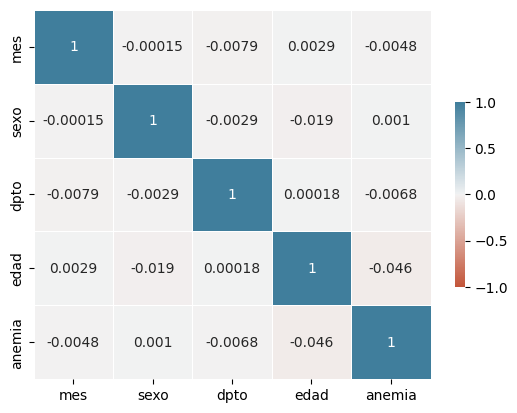

In [65]:
sns.heatmap(
    data=df_anemia_processed_scaled.corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

# ENTRENAMIENTO CON MODELO DE REGRESION LINEAL MULTIPLE

## ENTRENAMIENTO DEL MODELO DE REGRESION LINEAL MULTIPLE

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_linear_regression = df_anemia_processed.copy()
X = df_linear_regression.drop(columns = ['anemia'])
y = df_linear_regression[['anemia']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [68]:
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train,y_train)

y_pred = model_linear_regression.predict(X_test)
y_pred.shape

(395133, 1)

## METRICAS DE MODELO DE REGRESION LINEAL MULTIPLE

In [70]:
import sklearn.metrics as metrics

mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print(f" r2  : {r2}")
print(f" mse : {mse.round(4)}")

 r2  : 0.0023412581296291535
 mse : 0.0023


## CONCLUSIÓN : MODELO NO SIRVE PARA ESTE DATASET